In [183]:
!pip install -q torch scikit-learn

6349.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [184]:
import torch.nn as nn

class Reggression(nn.Module):
    def __init__(self, input_size: int, hidden1_size: int, hidden2_size: int, output_size: int):
        super(Reggression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))

        return x

### Load dataset

In [185]:
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch

df = pd.read_csv("data/housing_price_gold.csv")

label = ["area"]
features = [col for col in df.columns if col != label]

# create tensors
X = torch.tensor(df[features].values, dtype=torch.float32)
y = torch.tensor(df[label].values, dtype=torch.float32)

# create tensor dataframe
ds = TensorDataset(X, y)

# split data
train_size = int(0.8 * len(ds))
test_size = len(ds) - train_size
ds_train, ds_test = random_split(ds, [train_size, test_size])

# create loaders
train_loader = DataLoader(ds_train, batch_size=32, shuffle=True)

Progress: 25.0 %
Progress: 50.0 %
Progress: 75.0 %
Progress: 100.0 %


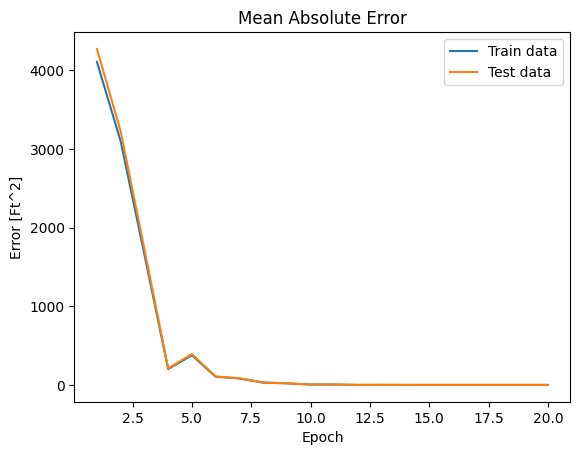

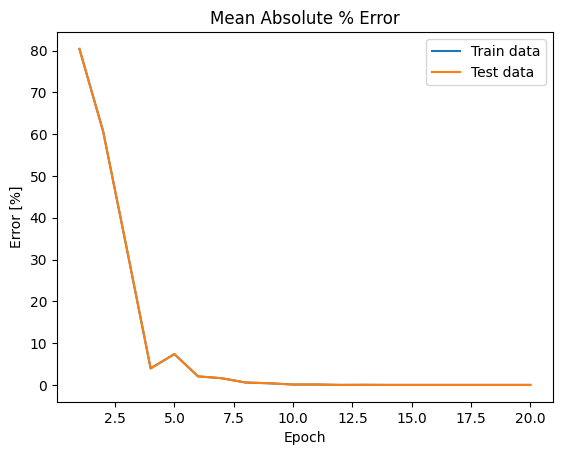

In [186]:
from torch.optim import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model = Reggression(input_size=len(features), hidden1_size=96, hidden2_size=48, output_size=1)
epochs = 20
optimizer = Adam(model.parameters())

X_train = torch.stack([x for x, _ in ds_train])
y_train = torch.stack([y for _, y in ds_train])

X_test = torch.stack([x for x, _ in ds_test])
y_test = torch.stack([y for _, y in ds_test])

MAE_train_log = []
MAPE_train_log = []

MAE_test_log = []
MAPE_test_log = []



criterion = nn.MSELoss()

for epoch in range(1, epochs + 1):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # check progress
    with torch.no_grad():
        model.eval()
        # test data
        y_pred = model(X_test)
        MAE = mean_absolute_error(y_test, y_pred)
        MAE_test_log.append(MAE)

        MAPE = mean_absolute_percentage_error(y_test, y_pred)
        MAPE_test_log.append(MAPE*100)

        # train data
        y_pred = model(X_train)
        MAE = mean_absolute_error(y_train, y_pred)
        MAE_train_log.append(MAE)

        MAPE = mean_absolute_percentage_error(y_train, y_pred)
        MAPE_train_log.append(MAPE*100)
    if epoch % 5 == 0:
        print(f"Progress: {epoch / epochs * 100:.1f} %")

import matplotlib.pyplot as plt

epochs_range = list(range(1, epochs + 1))

plt.plot(epochs_range, MAE_train_log, label="Train data")
plt.plot(epochs_range, MAE_test_log, label="Test data")
plt.xlabel("Epoch")
plt.ylabel("Error [Ft^2]")
plt.title("Mean Absolute Error")
plt.legend()
plt.show()

plt.plot(epochs_range, MAPE_train_log, label="Train data")
plt.plot(epochs_range, MAPE_test_log, label="Test data")
plt.xlabel("Epoch")
plt.ylabel("Error [%]")
plt.legend()
plt.title(r"Mean Absolute % Error")
plt.show()


In [187]:
MAE_test_log

[4273.164087977978,
 3223.0457315707426,
 1725.9308757257024,
 210.9530678845327,
 392.3431474878154,
 108.85538811639908,
 85.8933665424312,
 31.41900914743406,
 21.32560743979358,
 5.325428254013762,
 5.845167807482798,
 0.5735378440366973,
 1.4339039653813073,
 0.6566722064936926,
 0.5913522702838303,
 0.5755391252150229,
 0.5695084038130734,
 0.5688722942947247,
 0.5693493764334863,
 0.5689641270068807]

In [188]:
MAE_train_log

[4107.427016861941,
 3098.0150478258047,
 1658.9279488379802,
 202.66684687903168,
 377.24782401268635,
 104.74667414393994,
 82.45440869812572,
 30.09120136225989,
 20.609166976508746,
 5.229096018939937,
 5.508596717764478,
 0.5307589189721904,
 1.4884066800458715,
 0.5717672645498854,
 0.5327795186174025,
 0.5618112546588303,
 0.5426442557518635,
 0.5355126617151663,
 0.5425081865503154,
 0.5377984003189507]

In [189]:

with torch.no_grad():
    X_test, y_test = ds_test.dataset.tensors

    pred = model(X_test)
    ft_sq_to_m_sq = 0.092903
    MAE = mean_absolute_error(y_test, pred.squeeze())
    print(f"MAE: {MAE:.3f} ft^2")
    print(f"MAE: {(MAE*ft_sq_to_m_sq):.3f} m^2")


MAE: 0.544 ft^2
MAE: 0.051 m^2
